In [ ]:
data=pd.read_csv("HippoCorpusV2.csv")

In [7]:
# Checking the distribution and unique values in the 'timeSinceEvent' field
time_since_event_info = {
    "Unique Values": data['timeSinceEvent'].unique(),
    "Value Counts": data['timeSinceEvent'].value_counts(),
    "Null Count": data['timeSinceEvent'].isnull().sum()
}

time_since_event_info


{'Unique Values': array([9.00000000e+01, 1.50000000e+02, 3.00000000e+01, 2.10000000e+02,
        1.40000000e+01, 1.80000000e+02, 7.00000000e+00, 6.00000000e+01,
        2.40000000e+02, 6.66666667e+29, 1.20000000e+02, 2.22222222e+29,
        3.50000000e+01, 7.00000000e+01, 7.80000000e+02, 2.10000000e+01,
        4.20000000e+01, 5.60000000e+01, 3.00000000e+02, 4.44444444e+29,
        3.60000000e+02, 3.90000000e+02, 2.80000000e+01, 5.55555500e+06,
        4.44444400e+06, 4.90000000e+01, 6.60000000e+02, 3.33333300e+06,
        6.30000000e+01, 3.30000000e+02, 1.11111111e+59, 5.10000000e+02,
        1.11111100e+06, 2.22222200e+06, 1.11111111e+29, 2.70000000e+02,
        5.55555556e+29, 7.20000000e+02, 1.82000000e+02, 1.68000000e+02,
        2.42424242e+59, 3.33333333e+29, 9.80000000e+01, 8.40000000e+01,
        7.70000000e+01, 1.33000000e+02, 5.40000000e+02, 6.00000000e+02,
        4.20000000e+02, 1.26000000e+02, 4.50000000e+02, 5.70000000e+02,
        1.40000000e+02, 1.54000000e+02, 7.77777

In [ ]:
# Setting a threshold to differentiate between recalled and imagined stories
threshold = 10**4  # Any value above 10,000 days is considered an imagined story

# Classify stories
data['storyType'] = data['timeSinceEvent'].apply(lambda x: 'imagined' if x > threshold else 'recalled')

# Display the distribution of story types
story_type_distribution = data['storyType'].value_counts()
story_type_distribution


In [8]:
from textblob import TextBlob
import numpy as np
import pandas as pd

# Function to calculate linguistic features for a given text
def extract_linguistic_features(text):
    blob = TextBlob(text)
    word_count = len(blob.words)
    unique_word_count = len(set(blob.words))
    avg_word_length = np.mean([len(word) for word in blob.words]) if word_count > 0 else 0
    sentence_count = len(blob.sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    return {
        'word_count': word_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length
    }

# Extracting linguistic features for each story
linguistic_features = data['story'].apply(extract_linguistic_features)
linguistic_features_df = pd.DataFrame(list(linguistic_features))

# Combine with the original data
combined_data = pd.concat([data, linguistic_features_df], axis=1)

# Display the first few rows of the new dataset with linguistic features
combined_data.head()


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarityReason,story,stressful,summary,timeSinceEvent,word_count,unique_word_count,avg_word_length,sentence_count,avg_sentence_length
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,204,121,4.058824,15,13.600000
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0,186,101,3.741935,16,11.625000
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,267,147,3.902622,21,12.714286
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0,167,102,4.053892,15,11.133333
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,165,104,3.672727,15,11.000000


In [3]:
import re

# Adjusted function to calculate linguistic features without relying on external resources
def extract_linguistic_features_simple(text):
    words = re.findall(r'\b\w+\b', text.lower())
    sentences = re.split(r'[.!?]', text)

    word_count = len(words)
    unique_word_count = len(set(words))
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    sentence_count = len([s for s in sentences if s.strip()])  # Count non-empty sentences
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    return {
        'word_count': word_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length
    }

# Extracting linguistic features using the adjusted function
linguistic_features_simple = data['story'].apply(extract_linguistic_features_simple)
linguistic_features_df_simple = pd.DataFrame(list(linguistic_features_simple))

# Combine with the original data
combined_data_simple = pd.concat([data, linguistic_features_df_simple], axis=1)

# Display the first few rows of the new dataset with linguistic features
combined_data_simple.head()


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarityReason,story,stressful,summary,timeSinceEvent,word_count,unique_word_count,avg_word_length,sentence_count,avg_sentence_length
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,204,116,4.053922,15,13.600000
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0,187,96,3.700535,16,11.687500
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,267,142,3.898876,21,12.714286
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0,167,98,4.041916,15,11.133333
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,165,101,3.654545,15,11.000000


In [5]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 294.6/294.6 kB 8.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\shash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


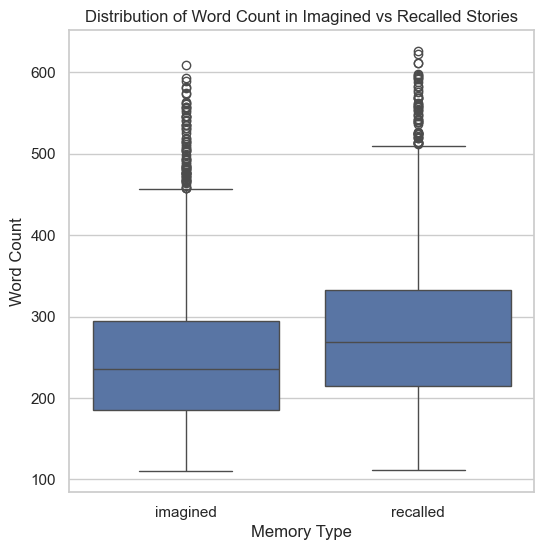

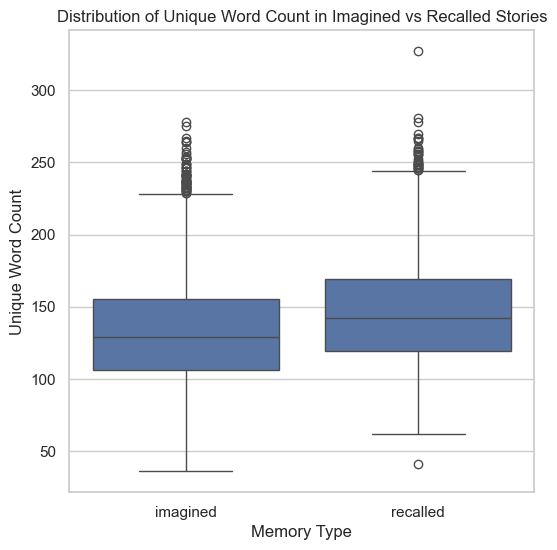

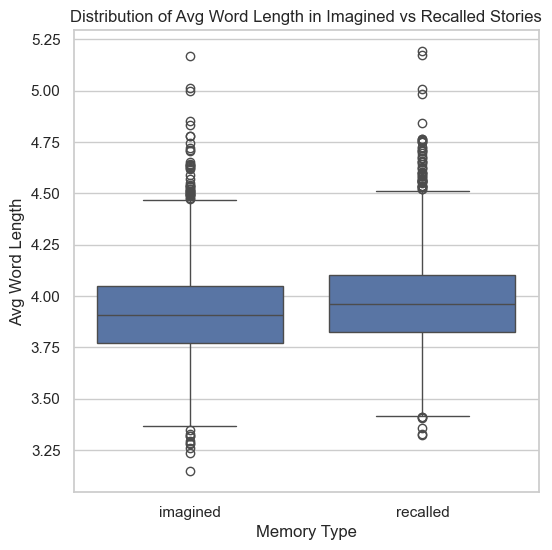

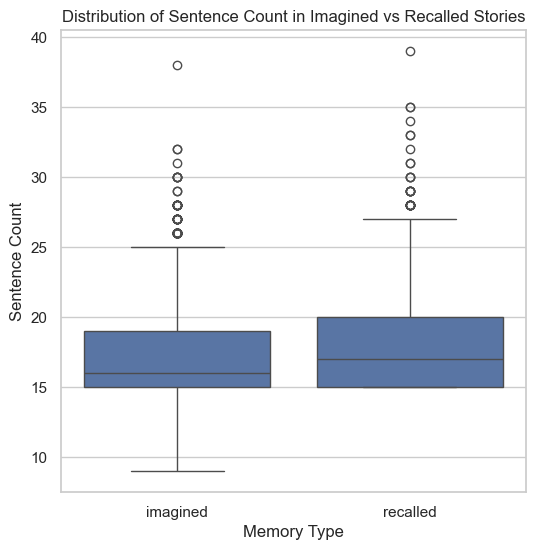

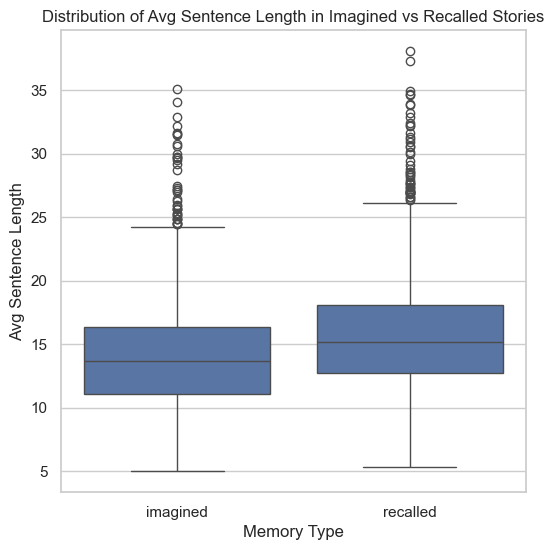

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
file_path = 'hippoCorpusV2.csv'  # Update this with the path to your file
data = pd.read_csv(file_path)

# Function to calculate linguistic features for a given text
def extract_linguistic_features_simple(text):
    words = re.findall(r'\b\w+\b', text.lower())
    sentences = re.split(r'[.!?]', text)
    word_count = len(words)
    unique_word_count = len(set(words))
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    sentence_count = len([s for s in sentences if s.strip()])  # Count non-empty sentences
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    return {
        'word_count': word_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length
    }

# Extracting linguistic features using the adjusted function
linguistic_features_simple = data['story'].apply(extract_linguistic_features_simple)
linguistic_features_df_simple = pd.DataFrame(list(linguistic_features_simple))

# Combine with the original data
combined_data_with_memType = pd.concat([data, linguistic_features_df_simple], axis=1)

# Filter data for 'imagined' and 'recalled' stories
filtered_data = combined_data_with_memType[combined_data_with_memType['memType'].isin(['imagined', 'recalled'])]

# List of features to plot
features_to_plot = ['word_count', 'unique_word_count', 'avg_word_length', 'sentence_count', 'avg_sentence_length']

# Setting up the plotting environment
sns.set(style="whitegrid")

# Creating plots for each feature
for feature in features_to_plot:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='memType', y=feature, data=filtered_data)
    plt.title(f'Distribution of {feature.replace("_", " ").title()} in Imagined vs Recalled Stories')
    plt.ylabel(feature.replace("_", " ").title())
    plt.xlabel('Memory Type')
    plt.show()


C:\Users\shash\AppData\Local\Temp\ipykernel_8172\3046813282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)


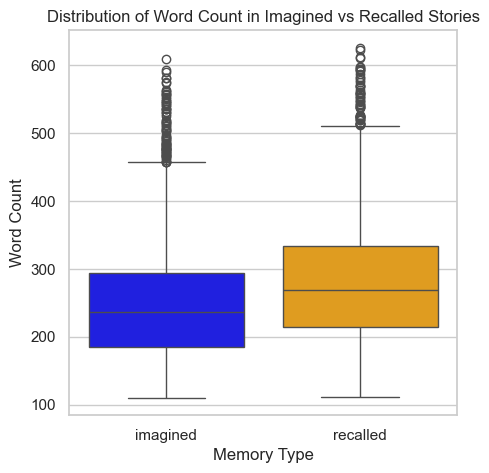

C:\Users\shash\AppData\Local\Temp\ipykernel_8172\3046813282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)


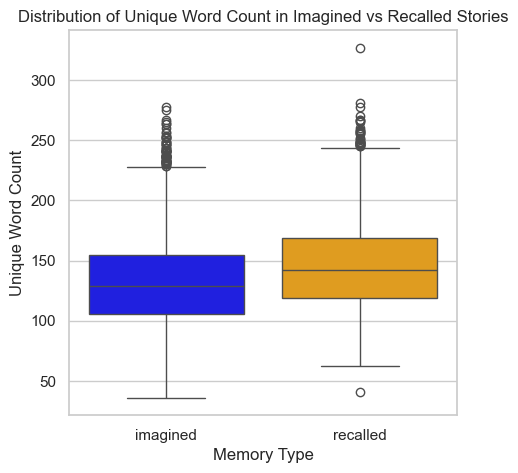

C:\Users\shash\AppData\Local\Temp\ipykernel_8172\3046813282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)


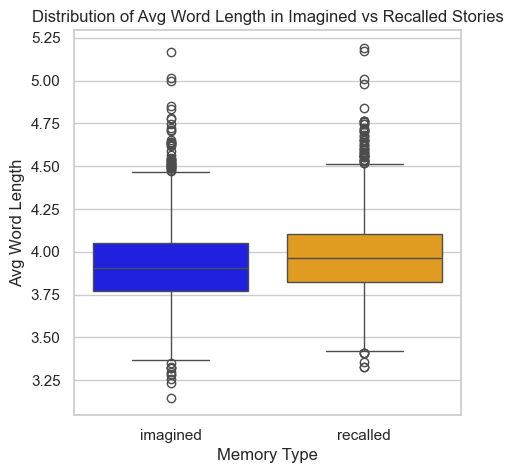

C:\Users\shash\AppData\Local\Temp\ipykernel_8172\3046813282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)


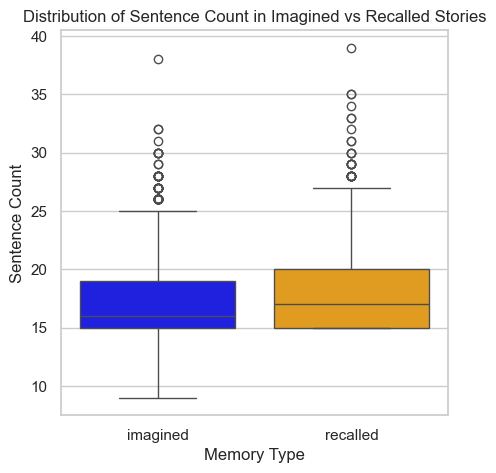

C:\Users\shash\AppData\Local\Temp\ipykernel_8172\3046813282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)


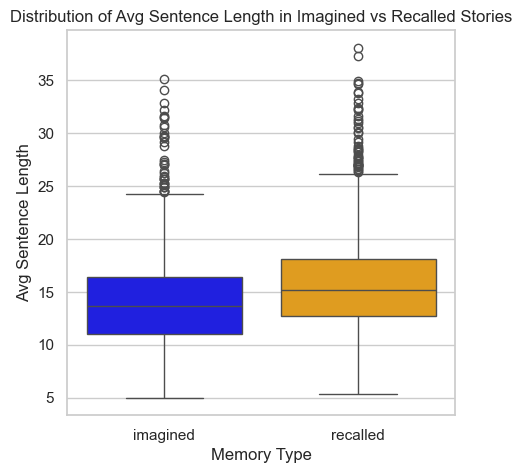

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
file_path = 'hippoCorpusV2.csv'  # Update this with the path to your file
data = pd.read_csv(file_path)

# Function to calculate linguistic features for a given text
def extract_linguistic_features_simple(text):
    words = re.findall(r'\b\w+\b', text.lower())
    sentences = re.split(r'[.!?]', text)
    word_count = len(words)
    unique_word_count = len(set(words))
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    sentence_count = len([s for s in sentences if s.strip()])  # Count non-empty sentences
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    return {
        'word_count': word_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length
    }

# Extracting linguistic features using the adjusted function
linguistic_features_simple = data['story'].apply(extract_linguistic_features_simple)
linguistic_features_df_simple = pd.DataFrame(list(linguistic_features_simple))

# Combine with the original data
combined_data_with_memType = pd.concat([data, linguistic_features_df_simple], axis=1)

# Filter data for 'imagined' and 'recalled' stories
filtered_data = combined_data_with_memType[combined_data_with_memType['memType'].isin(['imagined', 'recalled'])]

# List of features to plot
features_to_plot = ['word_count', 'unique_word_count', 'avg_word_length', 'sentence_count', 'avg_sentence_length']

# Setting up the plotting environment
sns.set(style="whitegrid")

# Custom color palette
custom_palette = {'imagined': 'blue', 'recalled': 'orange'}

# Creating plots for each feature
for feature in features_to_plot:
    plt.figure(figsize=(5,5))
    sns.boxplot(x='memType', y=feature, data=filtered_data, palette=custom_palette)
    plt.title(f'Distribution of {feature.replace("_", " ").title()} in Imagined vs Recalled Stories')
    plt.ylabel(feature.replace("_", " ").title())
    plt.xlabel('Memory Type')
    plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


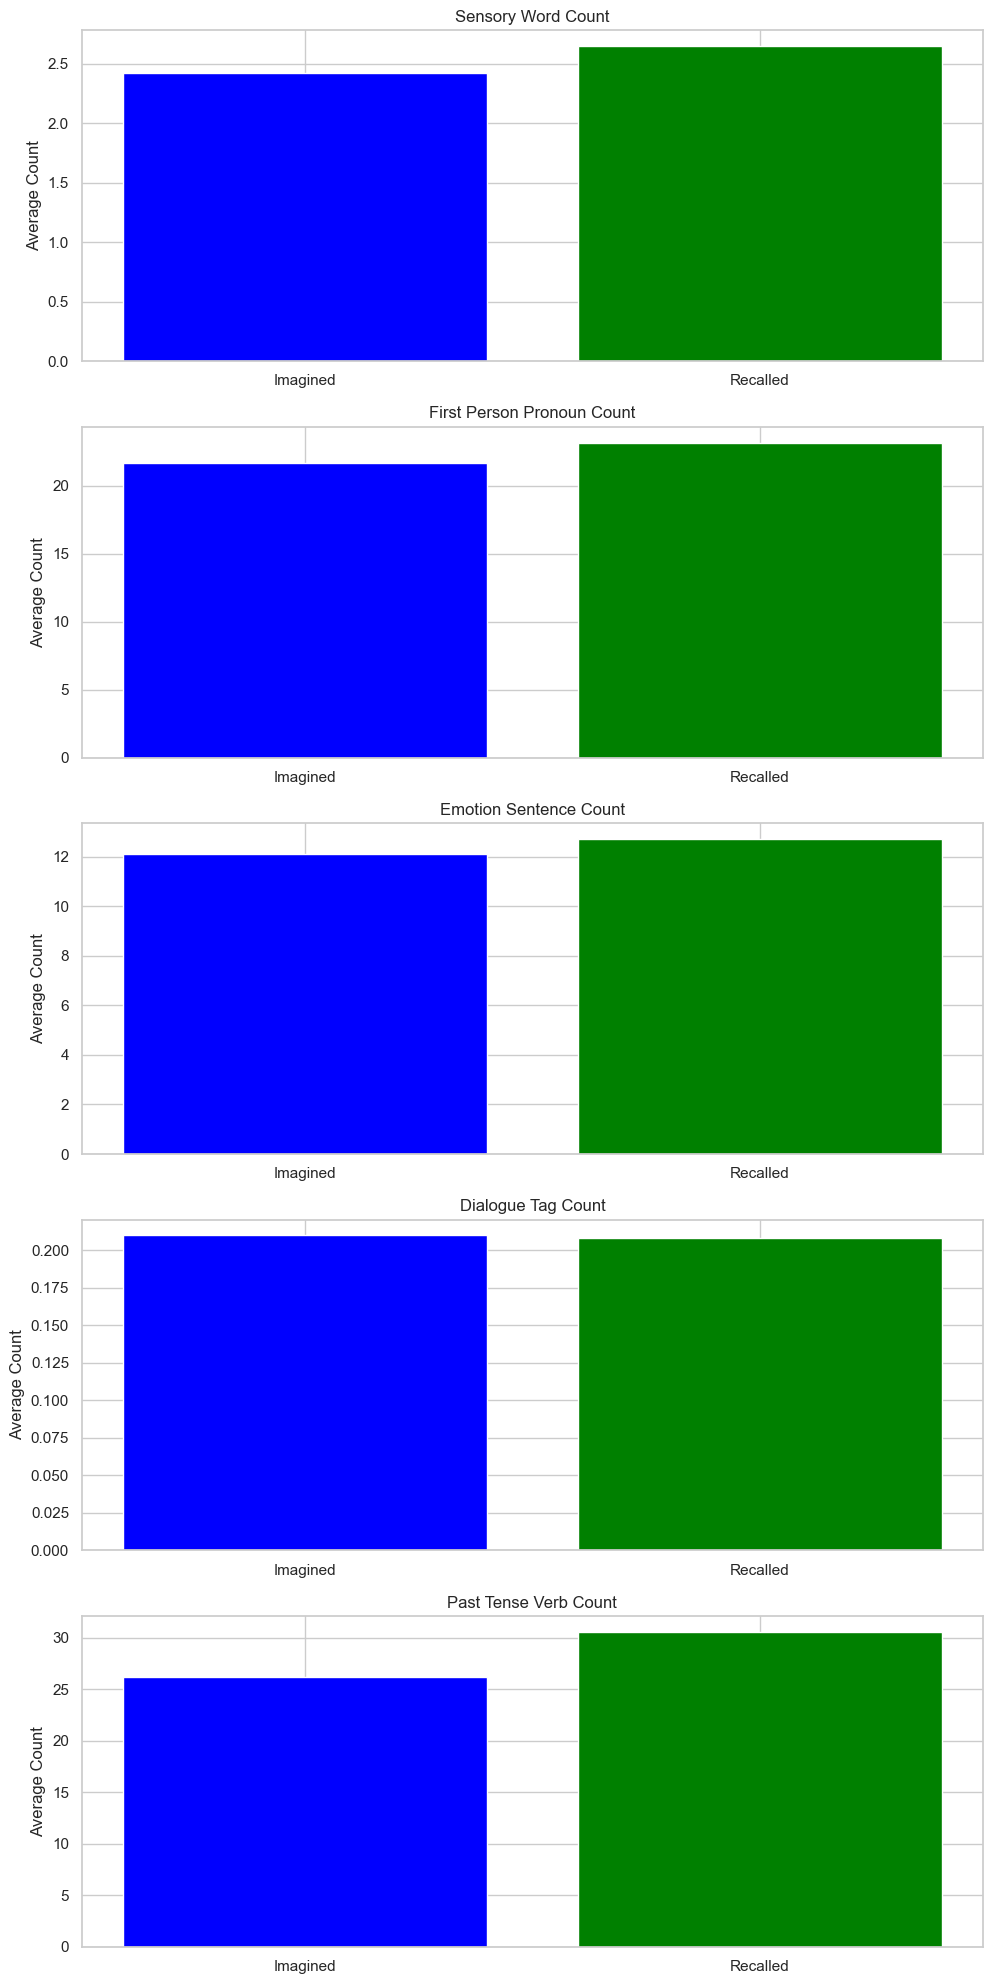

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('hippoCorpusV2.csv')

# Filter the dataset for imagined and recalled narratives
imagined_stories = df[df['memType'] == 'imagined']['story']
recalled_stories = df[df['memType'] == 'recalled']['story']

# Function to get synonyms using WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return synonyms

# Expand sensory words list
sensory_words = ['see', 'hear', 'touch', 'taste', 'smell']
expanded_sensory_words = set()
for word in sensory_words:
    expanded_sensory_words.update(get_synonyms(word))

# Define the analysis function
def analyze_stories(stories):
    first_person_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    dialogue_tags = ['say', 'ask', 'reply', 'yell', 'whisper']

    counts = {
        'sensory_word_count': [],
        'first_person_pronoun_count': [],
        'emotion_sentence_count': [],
        'dialogue_tag_count': [],
        'past_tense_verb_count': []
    }

    for story in stories:
        words = word_tokenize(story)
        sentences = sent_tokenize(story)
        tagged_words = pos_tag(words)

        counts['sensory_word_count'].append(sum(word.lower() in expanded_sensory_words for word in words))
        counts['first_person_pronoun_count'].append(sum(word in first_person_pronouns for word in words))
        counts['emotion_sentence_count'].append(sum(is_emotional(sentence) for sentence in sentences))
        counts['dialogue_tag_count'].append(sum(tag.startswith('VB') and word.lower() in dialogue_tags for word, tag in tagged_words))
        counts['past_tense_verb_count'].append(sum(tag in ['VBD', 'VBN'] for word, tag in tagged_words))

    return counts

# Function to check if a sentence is emotional
def is_emotional(sentence):
    blob = TextBlob(sentence)
    return blob.sentiment.polarity != 0 or blob.sentiment.subjectivity != 0

# Analyze both subsets
imagined_analysis = analyze_stories(imagined_stories)
recalled_analysis = analyze_stories(recalled_stories)

# Function to plot the results
def plot_metrics(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)

    fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(10, num_metrics * 4))

    for i, metric in enumerate(metrics):
        avg_imagined = np.mean(imagined_metrics[metric])
        avg_recalled = np.mean(recalled_metrics[metric])

        axes[i].bar('Imagined', avg_imagined, color='blue')
        axes[i].bar('Recalled', avg_recalled, color='green')
        axes[i].set_ylabel('Average Count')
        axes[i].set_title(metric.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(imagined_analysis, recalled_analysis)


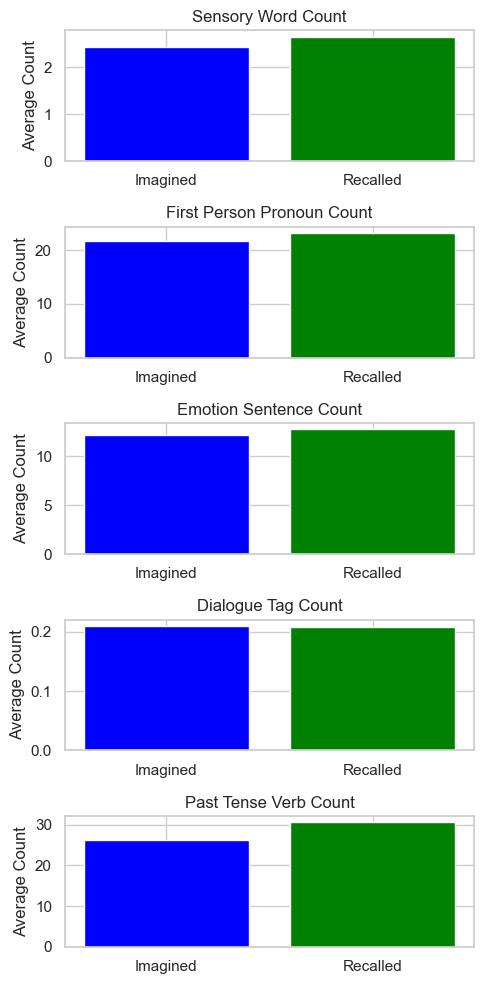

In [17]:
def plot_metrics(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)

    fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(5, num_metrics * 2))

    for i, metric in enumerate(metrics):
        avg_imagined = np.mean(imagined_metrics[metric])
        avg_recalled = np.mean(recalled_metrics[metric])

        axes[i].bar('Imagined', avg_imagined, color='blue')
        axes[i].bar('Recalled', avg_recalled, color='green')
        axes[i].set_ylabel('Average Count')
        axes[i].set_title(metric.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(imagined_analysis, recalled_analysis)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


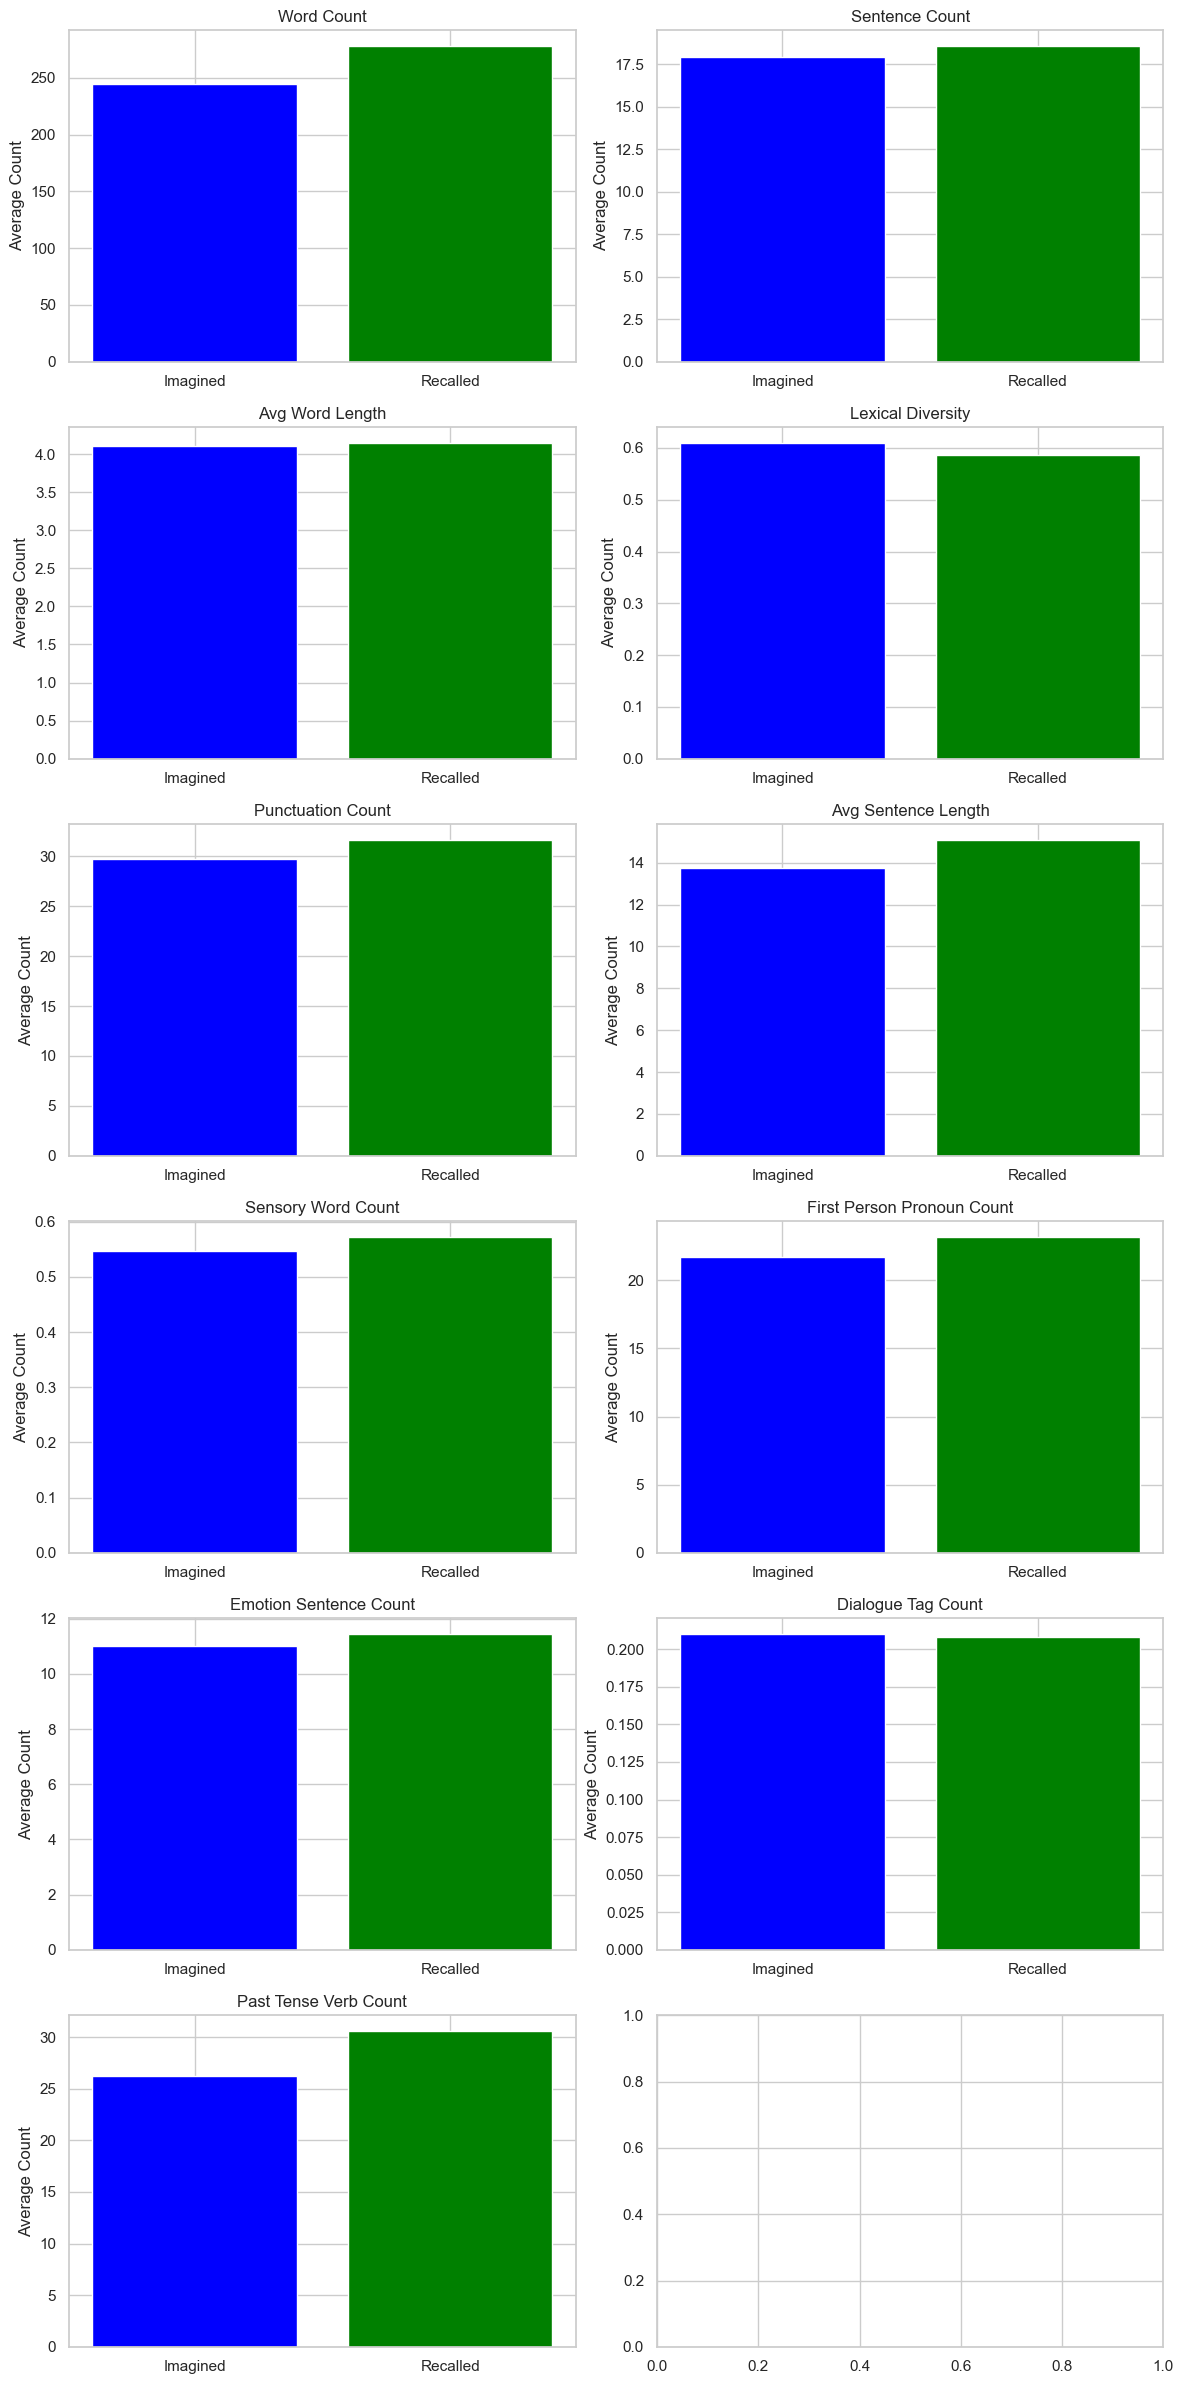

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from textblob import TextBlob
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('hippoCorpusV2.csv')

# Basic text analysis function
def basic_analyze_stories(stories):
    analysis_results = {
        'word_count': [],
        'sentence_count': [],
        'avg_word_length': [],
        'lexical_diversity': [],
        'punctuation_count': [],
        'avg_sentence_length': [],
    }

    for story in stories:
        words = story.split()
        sentences = story.split('.')
        word_count = len(words)
        sentence_count = len(sentences)
        avg_word_length = sum(len(word) for word in words) / word_count if word_count else 0
        lexical_diversity = len(set(words)) / word_count if word_count else 0
        punctuation_count = sum(1 for char in story if char in string.punctuation)
        avg_sentence_length = word_count / sentence_count if sentence_count else 0

        analysis_results['word_count'].append(word_count)
        analysis_results['sentence_count'].append(sentence_count)
        analysis_results['avg_word_length'].append(avg_word_length)
        analysis_results['lexical_diversity'].append(lexical_diversity)
        analysis_results['punctuation_count'].append(punctuation_count)
        analysis_results['avg_sentence_length'].append(avg_sentence_length)

    return analysis_results

# Advanced text analysis function
def analyze_stories(stories):
    # Define word lists
    sensory_words = ['see', 'hear', 'touch', 'taste', 'smell']
    first_person_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    dialogue_tags = ['say', 'ask', 'reply', 'yell', 'whisper']

    counts = {
        'sensory_word_count': [],
        'first_person_pronoun_count': [],
        'emotion_sentence_count': [],
        'dialogue_tag_count': [],
        'past_tense_verb_count': []
    }

    for story in stories:
        words = word_tokenize(story)
        sentences = sent_tokenize(story)
        tagged_words = pos_tag(words)

        counts['sensory_word_count'].append(sum(word.lower() in sensory_words for word in words))
        counts['first_person_pronoun_count'].append(sum(word in first_person_pronouns for word in words))
        counts['emotion_sentence_count'].append(sum(TextBlob(sentence).sentiment.polarity != 0 for sentence in sentences))
        counts['dialogue_tag_count'].append(sum(tag.startswith('VB') and word.lower() in dialogue_tags for word, tag in tagged_words))
        counts['past_tense_verb_count'].append(sum(tag in ['VBD', 'VBN'] for word, tag in tagged_words))

    return counts

# Filter the dataset
imagined_stories = df[df['memType'] == 'imagined']['story']
recalled_stories = df[df['memType'] == 'recalled']['story']

# Perform analyses
basic_imagined_analysis = basic_analyze_stories(imagined_stories)
basic_recalled_analysis = basic_analyze_stories(recalled_stories)
imagined_analysis = analyze_stories(imagined_stories)
recalled_analysis = analyze_stories(recalled_stories)

# Combine all metrics into single dictionaries
all_imagined_analysis = {**basic_imagined_analysis, **imagined_analysis}
all_recalled_analysis = {**basic_recalled_analysis, **recalled_analysis}

# Plotting function
def plot_all_metrics(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)
    num_cols = 2
    num_rows = (num_metrics + 1) // num_cols

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))

    for i, metric in enumerate(metrics):
        row, col = divmod(i, num_cols)
        avg_imagined = np.mean(imagined_metrics[metric])
        avg_recalled = np.mean(recalled_metrics[metric])

        axes[row, col].bar('Imagined', avg_imagined, color='blue')
        axes[row, col].bar('Recalled', avg_recalled, color='green')
        axes[row, col].set_ylabel('Average Count')
        axes[row, col].set_title(metric.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

# Plot all the metrics
plot_all_metrics(all_imagined_analysis, all_recalled_analysis)


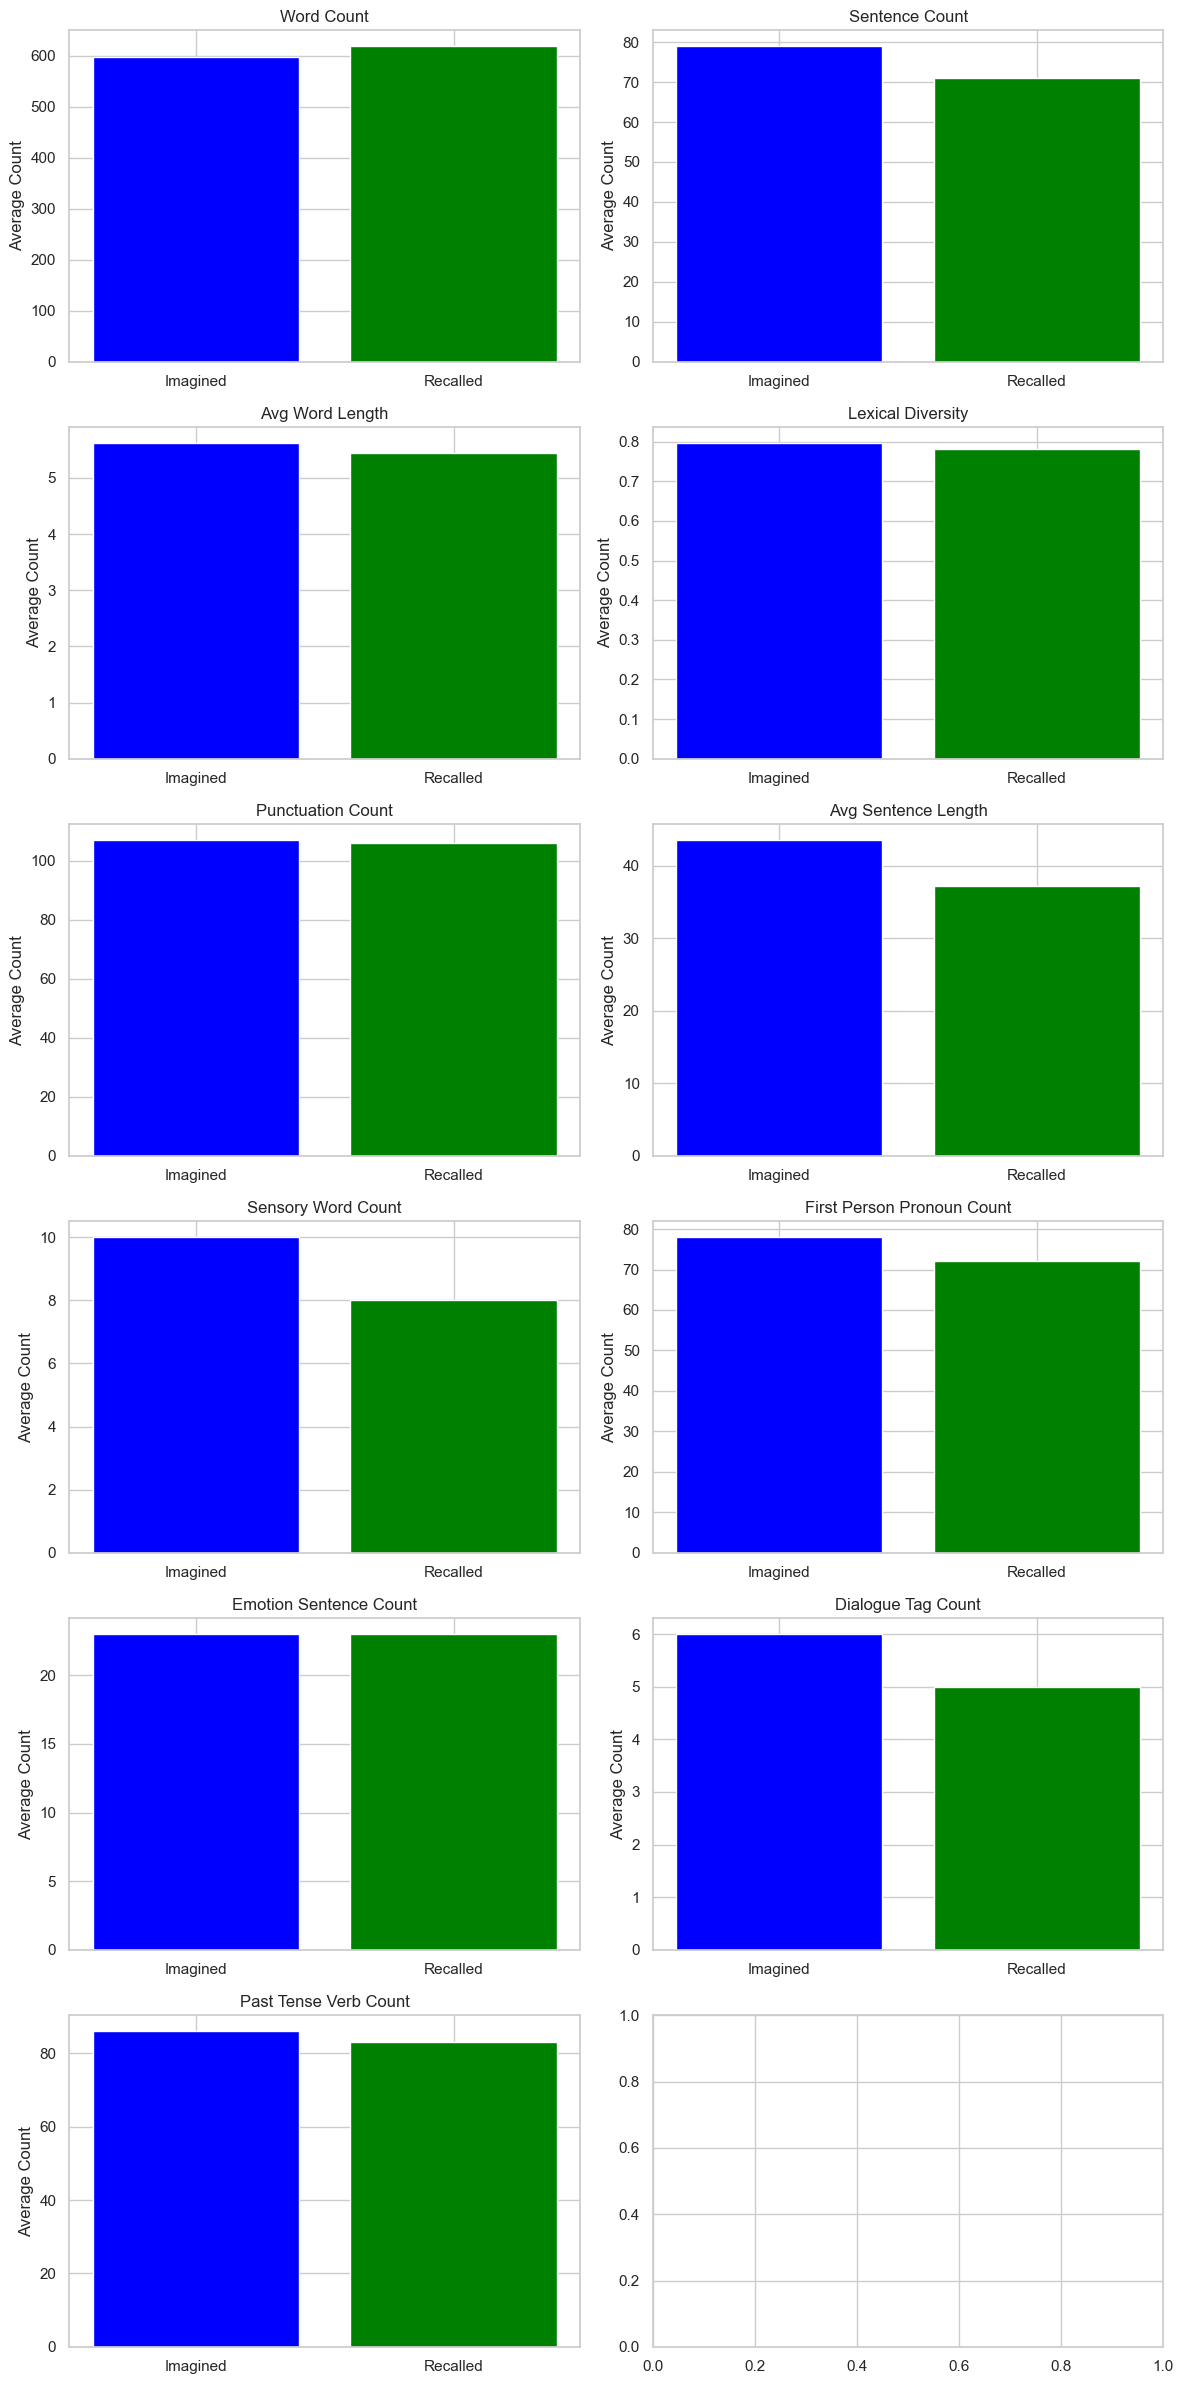

In [21]:
def plot_all_metrics(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)
    num_cols = 2
    num_rows = (num_metrics + 1) // num_cols

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))

    for i, metric in enumerate(metrics):
        row, col = divmod(i, num_cols)
        avg_imagined = np.max(imagined_metrics[metric])
        avg_recalled = np.max(recalled_metrics[metric])

        axes[row, col].bar('Imagined', avg_imagined, color='blue')
        axes[row, col].bar('Recalled', avg_recalled, color='green')
        axes[row, col].set_ylabel('Average Count')
        axes[row, col].set_title(metric.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

# Plot all the metrics
plot_all_metrics(all_imagined_analysis, all_recalled_analysis)

In [25]:
all_imagined_analysis

{'word_count': [203,
  266,
  162,
  304,
  332,
  334,
  220,
  232,
  363,
  256,
  187,
  251,
  182,
  216,
  258,
  282,
  488,
  170,
  116,
  482,
  454,
  134,
  189,
  253,
  306,
  185,
  129,
  266,
  123,
  270,
  417,
  264,
  300,
  273,
  198,
  127,
  309,
  129,
  407,
  217,
  450,
  147,
  144,
  485,
  196,
  190,
  249,
  252,
  232,
  243,
  398,
  482,
  381,
  473,
  260,
  133,
  190,
  219,
  240,
  302,
  235,
  124,
  228,
  273,
  201,
  346,
  291,
  243,
  198,
  223,
  193,
  216,
  385,
  244,
  170,
  228,
  191,
  412,
  311,
  208,
  230,
  351,
  417,
  217,
  177,
  242,
  197,
  274,
  399,
  160,
  250,
  253,
  209,
  245,
  143,
  213,
  240,
  373,
  162,
  151,
  222,
  221,
  341,
  371,
  185,
  167,
  184,
  220,
  131,
  211,
  190,
  208,
  226,
  282,
  139,
  303,
  291,
  275,
  248,
  280,
  246,
  257,
  298,
  216,
  124,
  219,
  505,
  321,
  260,
  193,
  193,
  271,
  460,
  580,
  185,
  241,
  159,
  473,
  230,
  158,
  131,

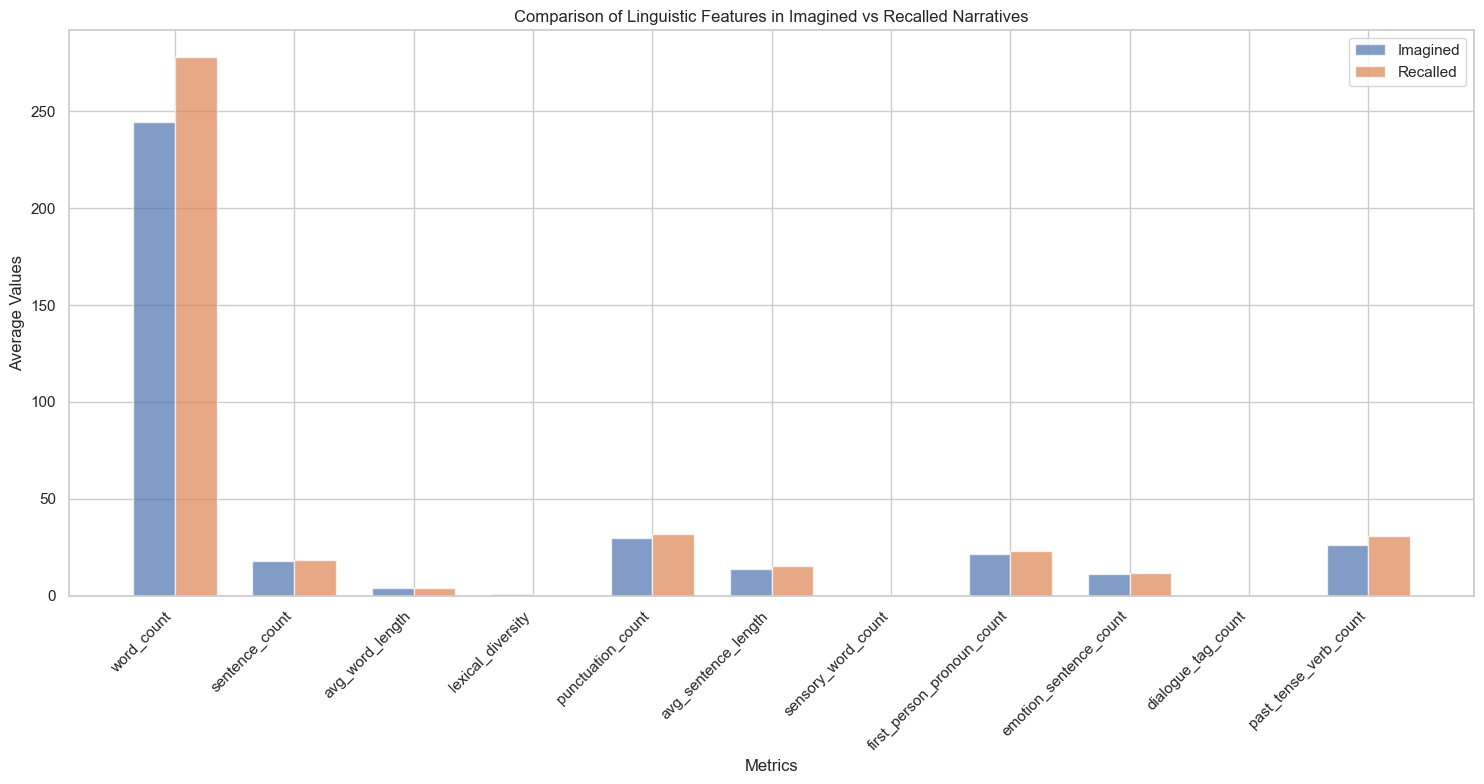

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming all_imagined_analysis and all_recalled_analysis are dictionaries with your metrics

def plot_grouped_bar_chart(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)

    # Calculate averages for each metric
    imagined_averages = [np.mean(imagined_metrics[metric]) for metric in metrics]
    recalled_averages = [np.mean(recalled_metrics[metric]) for metric in metrics]

    # Setting the positions and width for the bars
    pos = np.arange(num_metrics)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 8))
    bars1 = ax.bar(pos - bar_width/2, imagined_averages, bar_width, label='Imagined', alpha=0.7)
    bars2 = ax.bar(pos + bar_width/2, recalled_averages, bar_width, label='Recalled', alpha=0.7)

    # Adding labels, title and axes ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Comparison of Linguistic Features in Imagined vs Recalled Narratives')
    ax.set_xticks(pos)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis)


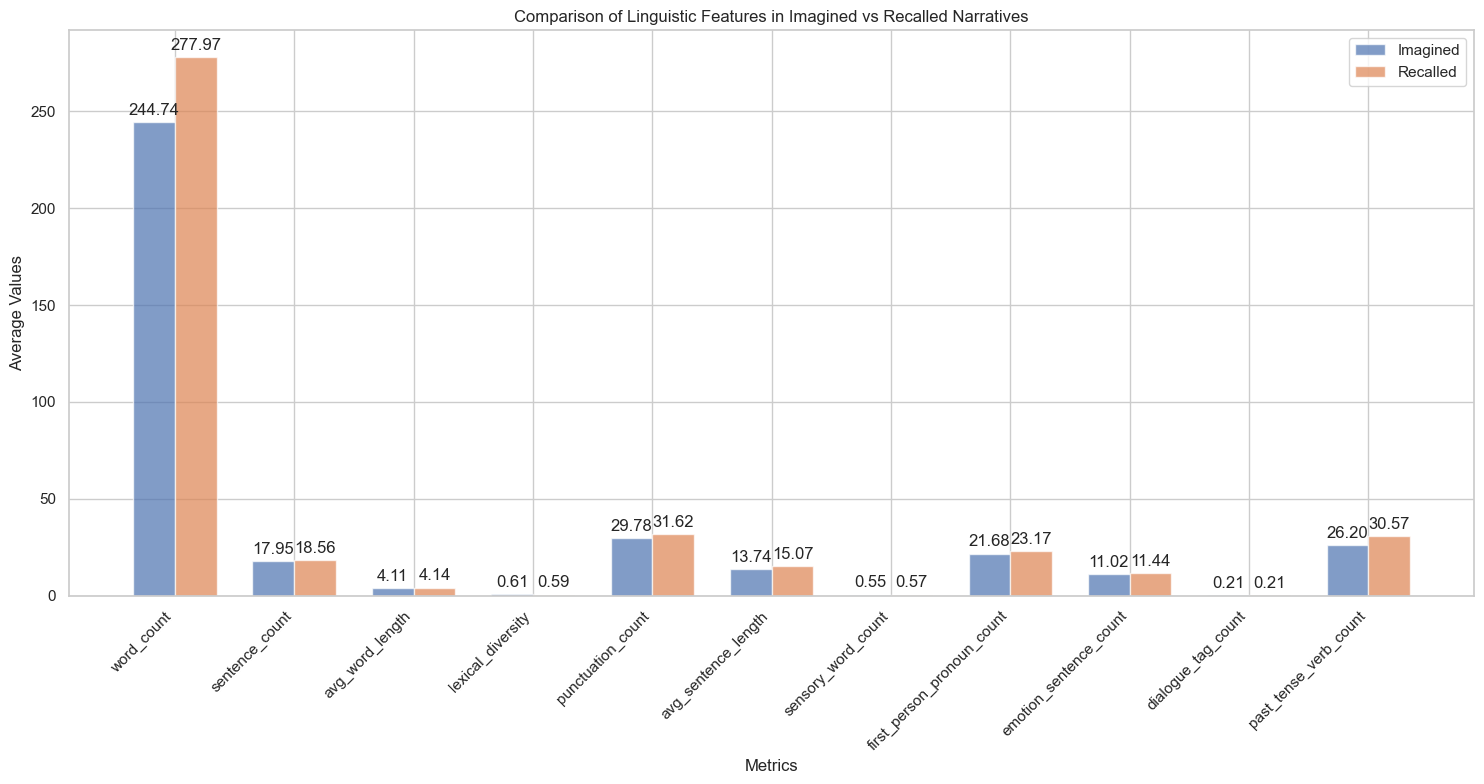

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar_chart(imagined_metrics, recalled_metrics):
    metrics = list(imagined_metrics.keys())
    num_metrics = len(metrics)

    # Calculate averages for each metric
    imagined_averages = [np.mean(imagined_metrics[metric]) for metric in metrics]
    recalled_averages = [np.mean(recalled_metrics[metric]) for metric in metrics]

    # Setting the positions and width for the bars
    pos = np.arange(num_metrics)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 8))
    bars1 = ax.bar(pos - bar_width/2, imagined_averages, bar_width, label='Imagined', alpha=0.7)
    bars2 = ax.bar(pos + bar_width/2, recalled_averages, bar_width, label='Recalled', alpha=0.7)

    # Function to add value labels
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adding labels, title and axes ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Comparison of Linguistic Features in Imagined vs Recalled Narratives')
    ax.set_xticks(pos)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis)


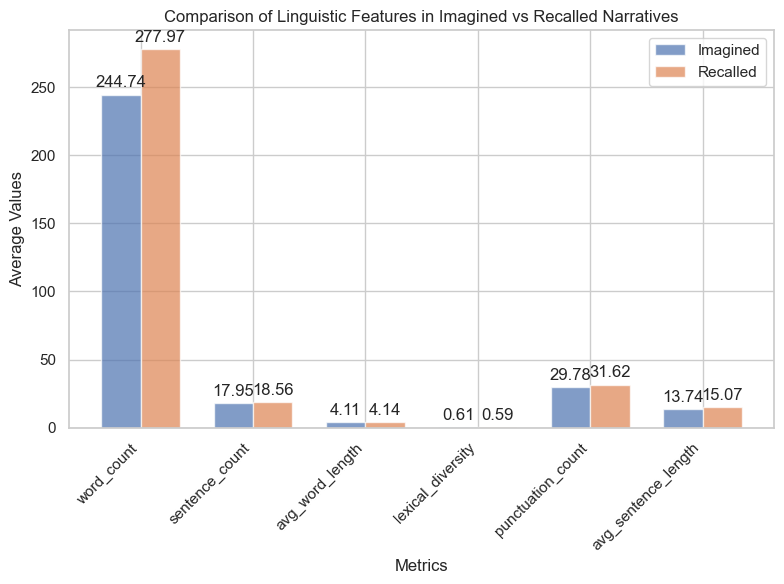

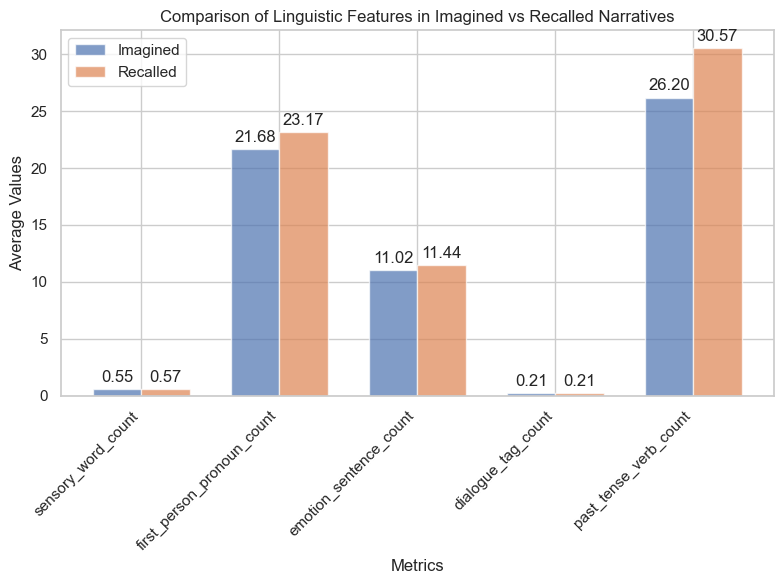

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar_chart(imagined_metrics, recalled_metrics, metrics_subset):
    num_metrics = len(metrics_subset)

    # Calculate averages for each metric in the subset
    imagined_averages = [np.mean(imagined_metrics[metric]) for metric in metrics_subset]
    recalled_averages = [np.mean(recalled_metrics[metric]) for metric in metrics_subset]

    # Setting the positions and width for the bars
    pos = np.arange(num_metrics)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    bars1 = ax.bar(pos - bar_width/2, imagined_averages, bar_width, label='Imagined', alpha=0.7)
    bars2 = ax.bar(pos + bar_width/2, recalled_averages, bar_width, label='Recalled', alpha=0.7)

    # Function to add value labels
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adding labels, title, and axes ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Comparison of Linguistic Features in Imagined vs Recalled Narratives')
    ax.set_xticks(pos)
    ax.set_xticklabels(metrics_subset, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Define all metrics
all_metrics = list(all_imagined_analysis.keys())

# Split metrics into two subsets
first_six_metrics = all_metrics[:6]
remaining_metrics = all_metrics[6:]

# Call the function for each subset of metrics
plot_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, first_six_metrics)
plot_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, remaining_metrics)


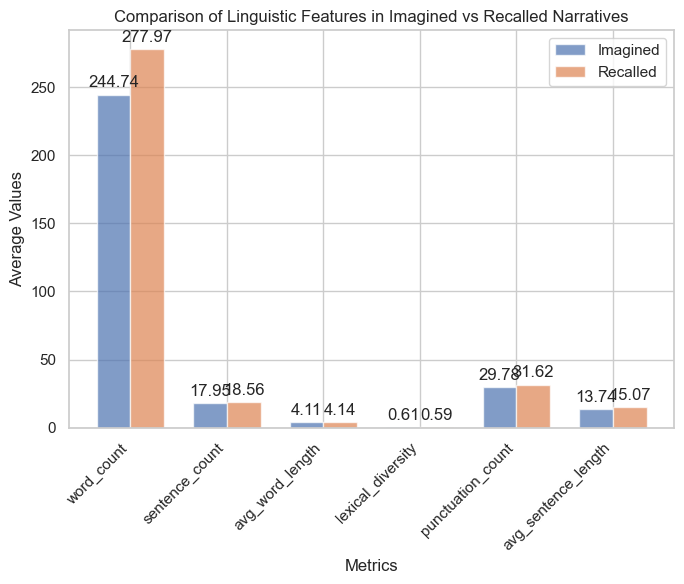

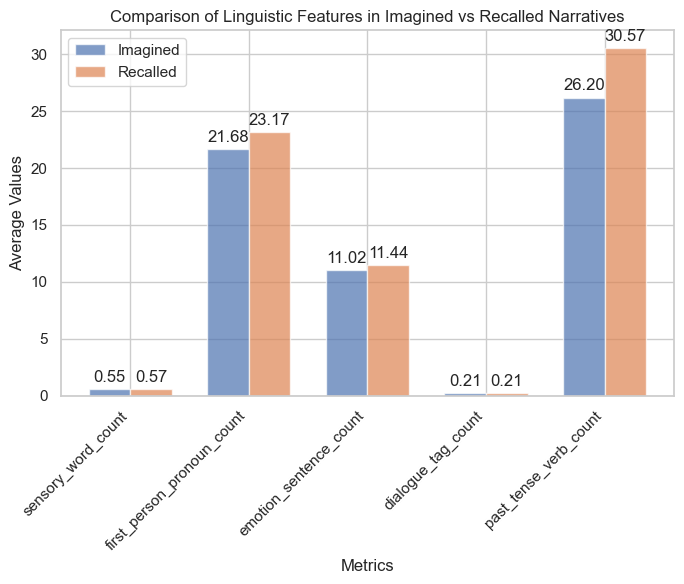

In [32]:
def plot_and_save_grouped_bar_chart(imagined_metrics, recalled_metrics, metrics_subset, filename):
    num_metrics = len(metrics_subset)

    # Calculate averages for each metric in the subset
    imagined_averages = [np.mean(imagined_metrics[metric]) for metric in metrics_subset]
    recalled_averages = [np.mean(recalled_metrics[metric]) for metric in metrics_subset]

    # Setting the positions and width for the bars
    pos = np.arange(num_metrics)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 6))
    bars1 = ax.bar(pos - bar_width/2, imagined_averages, bar_width, label='Imagined', alpha=0.7)
    bars2 = ax.bar(pos + bar_width/2, recalled_averages, bar_width, label='Recalled', alpha=0.7)

    # Function to add value labels
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adding labels, title, and axes ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Comparison of Linguistic Features in Imagined vs Recalled Narratives')
    ax.set_xticks(pos)
    ax.set_xticklabels(metrics_subset, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'{filename}.png', format='png', dpi=300)
    
    plt.show()

# Define all metrics
all_metrics = list(all_imagined_analysis.keys())

# Split metrics into two subsets
first_six_metrics = all_metrics[:6]
remaining_metrics = all_metrics[6:]

# Call the function for each subset of metrics and save the plots
plot_and_save_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, first_six_metrics, "first_six_metrics")
plot_and_save_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, remaining_metrics, "remaining_metrics")


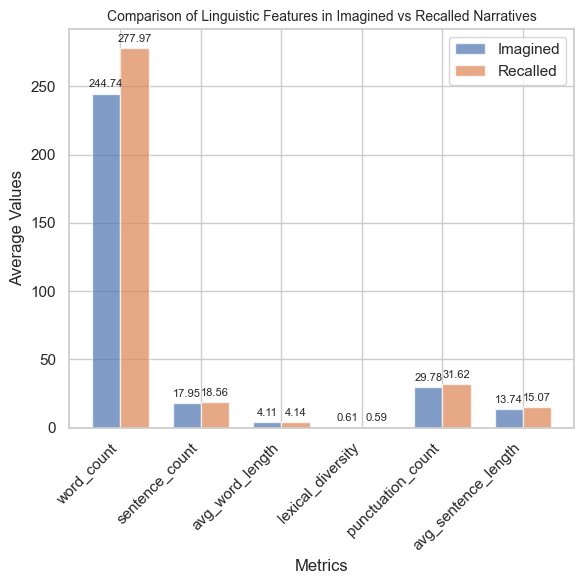

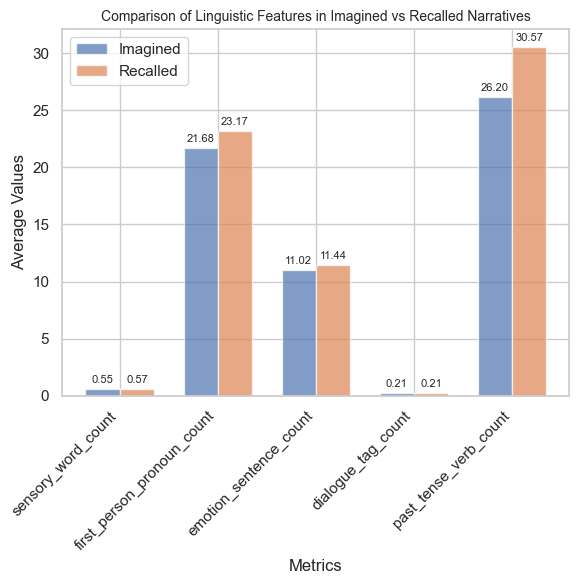

In [34]:
def plot_and_save_grouped_bar_chart(imagined_metrics, recalled_metrics, metrics_subset, filename):
    num_metrics = len(metrics_subset)

    # Calculate averages for each metric in the subset
    imagined_averages = [np.mean(imagined_metrics[metric]) for metric in metrics_subset]
    recalled_averages = [np.mean(recalled_metrics[metric]) for metric in metrics_subset]

    # Setting the positions and width for the bars
    pos = np.arange(num_metrics)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    bars1 = ax.bar(pos - bar_width/2, imagined_averages, bar_width, label='Imagined', alpha=0.7)
    bars2 = ax.bar(pos + bar_width/2, recalled_averages, bar_width, label='Recalled', alpha=0.7)

    # Function to add value labels with smaller font size
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)  # Smaller font size

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adding labels, title (with smaller font size), and axes ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Comparison of Linguistic Features in Imagined vs Recalled Narratives', fontsize=10)  # Smaller font size
    ax.set_xticks(pos)
    ax.set_xticklabels(metrics_subset, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'{filename}.png', format='png', dpi=300)
    
    plt.show()

# Define all metrics
all_metrics = list(all_imagined_analysis.keys())

# Split metrics into two subsets
first_six_metrics = all_metrics[:6]
remaining_metrics = all_metrics[6:]

# Call the function for each subset of metrics and save the plots
plot_and_save_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, first_six_metrics, "first_six_metrics")
plot_and_save_grouped_bar_chart(all_imagined_analysis, all_recalled_analysis, remaining_metrics, "remaining_metrics")
